# TensorFlow Regression Example

More Realistic. More data points. Batches.

The tf.estimator is for things that are easier. TensorFlow is more for things that need a specific neural network, customized, whatever...

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from sklearn.model_selection import train_test_split

# remember TensorFlow and SciKit-Learn up here

## Creating Data

#### One Million Points!

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000) # We're not quite ready for a real dataset

In [3]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

#### Noise

In [4]:
# No random seed (?)
noise = np.random.randn(len(x_data))

In [5]:
noise

array([ 1.70159055,  0.25721029,  0.27707293, ..., -1.44869069,
       -0.75445202, -0.23383496])

#### Now, for the data

$ y = mx + b + noise $ just to make it more difficult for the model

Jose, seemingly arbitrarily, chooses $ b = 5 $ and $ m = 0.5 $ to start

In [6]:
y_true = ( 0.5 * x_data ) + 5 + noise

Pandas

In [7]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [8]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [9]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [10]:
y_df.head()

,Y
0,6.701591
1,5.257215
2,5.277083
3,5.643431
4,6.226580


In [11]:
my_data = pd.concat(
         [ x_df, y_df], axis=1) 
              # axis=1 keeps it from stacking on like pancakes

Copied from the course notes version:

```
my_data = pd.concat(
        [pd.DataFrame(data=x_data,columns=['X Data']),
         pd.DataFrame(data=y_true,columns=['Y'])
    ],
    axis=1
)
```

In [12]:
my_data.head()

,X Data,Y
0,0.00000,6.701591
1,0.00001,5.257215
2,0.00002,5.277083
3,0.00003,5.643431
4,0.00004,6.226580


In [13]:
# my_data.plot() might crash the kernel
my_sample = my_data.sample(n=250)

In [14]:
my_sample.head()

,X Data,Y
589163,5.891636,7.614337
353099,3.530994,6.483128
319572,3.195723,8.379148
592763,5.927636,8.705950
451280,4.512805,6.901867


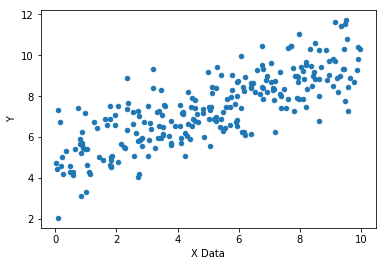

In [15]:
my_sample.plot(kind='scatter', x = 'X Data', y='Y')

# TensorFlow

## Batch Size

> We will take the data in batches (1 000 000 points is a lot to pass in at once).

In [16]:
# random points to grab, If you had a trillion, probably use smaller batches
batch_size = 8

#### Variables

In [17]:
m_pre, b_pre = np.random.randn(2)

In [18]:
type(m_pre)

numpy.float64

In [19]:
type(b_pre)

numpy.float64

In [20]:
# I didn't follow this, because using 'dtype' instead of 'type' worked
#tf.cast(m_pre, tf.float32)
#tf.cast(b_pre, tf.float32)

In [21]:
#  DWB, I had to add the type
#+ Jose just used, e.g. 'm = tf.Variable(0.81)'
m = tf.Variable(m_pre, dtype=tf.float32) 
b = tf.Variable(b_pre, dtype=tf.float32)

print("Initally: m = " + str(m_pre) + " ; " + "b = " + str(b_pre))

Initally: m = 0.9219094411077142 ; b = 1.0924033019342743


#### Placeholders

In [22]:
x_ph = tf.placeholder(tf.float32, [batch_size])

In [23]:
y_ph = tf.placeholder(tf.float32, [batch_size])

So, I'm getting that placeholders get your data, while variables are what you're trying to predict. I'm not sure that's exactly correct, but it's what I'm getting right now.

#### Graph
 
What are we trying to do here? Fit a line to some points. So it's a $ y = mx + b $ kind of graph

In [24]:
y_model = m * x_ph + b # Had to mess with type to get this to work

#### Loss Function

In [25]:
#  Remember that y_value is the true value
#+ Also, we square it to punish the error more,
#+ and thus bring it closer more quickly.
#+ could use '() ** 2' instead of tf.square()

error = tf.reduce_sum(tf.square(y_ph - y_model))

#### Optimizer

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

#### Initialize Variables

In [27]:
init = tf.global_variables_initializer()

### Session

In [28]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_index = np.random.randint(len(x_data),
                                       size=batch_size)
        
        #  DWB: it seems to me we'll only we doing 8000 out
        #+ of the 1e6 points. That will make it go faster, I
        #+ guess.
        #
        #  Jose says we can play around with batches and
        #+ batch_size to see if we have enough data to 
        #+ train it well. He seems to suggest that, if we
        #+ were to use more of the training data, we would
        #+ overfit to the training data. Not sure if that
        #+ applies here ... wait, yes it kinda does but not
        #+ in a way that's too concerning - we're taking
        #+ random parts ...
        
        feed = {x_ph:x_data[rand_index], 
                y_ph:y_true[rand_index]}
                
        sess.run(train, feed_dict=feed)
        
        #  So, we have it fitting the data with 8 random points
        #+ for each
        
    ##endof:  for i
    
    #  Fetch the slope and intercept values (run will go get the 
    #+ m and b placeholders)
    model_m, model_b = sess.run([m, b])
    
##endof:  with ... sess

In [29]:
model_m # should come out close to our 0.5

0.52672875

In [30]:
model_b #should come out close to our 5

4.949375

So, we went from whatever our original m and b values were - in my case $ m = -1.8 $ and $ b = 0.5 $. The values used for this specific training can be found with the following cell.

In [31]:
print("m_init = " + str(m_pre) + " ; " + "b_init = " + str(b_pre))

m_init = 0.9219094411077142 ; b_init = 1.0924033019342743


And we ended up with the `model_m` and `model_b` shown above, which are quite close to the values before noise, m = 0.5, b = 5; Things would look even nicer if we took the error over the value.

In [32]:
print("Delta_m = " + str(abs(0.5 - model_m)) + ";\n" + \
      "Delta_b = " + str(abs(5.0 - model_b)))

Delta_m = 0.02672874927520752;
Delta_b = 0.050624847412109375


### Results

In [33]:
y_hat = x_data * model_m + model_b # rem. y_hat represents the predicted

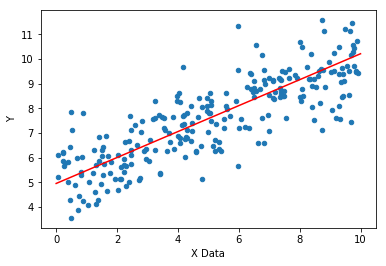

In [34]:
my_data.sample(250).plot(kind="scatter",
                         x="X Data", y="Y")
plt.plot(x_data, y_hat, 'r') #  Oh, so I see Pandas is using 
                             #+ the matplotlib canvas. Cool!

Jose changes the above code for 10k batches, I'm going to have it all re-written, so I can compare better. I will stick it to the anti-Q&R voice by not renaming the variables. Wahahaha!

I though I might have to rename them, then I think I figured that I could get rid of an error that came up by initializing the variables. Nope, had to re-put-in all the code. But I'm not renaming the variables. Wahahaha!

In [35]:
#  DWB, I had to add the type
#+ Jose just used, e.g. 'm = tf.Variable(0.81)'
m = tf.Variable(m_pre, dtype=tf.float32) 
b = tf.Variable(b_pre, dtype=tf.float32)
print("Initally: m = " + str(m_pre) + " ; " + "b = " + str(b_pre))
x_ph = tf.placeholder(tf.float32, [batch_size])
y_ph = tf.placeholder(tf.float32, [batch_size])
y_model = m * x_ph + b
error = tf.reduce_sum(tf.square(y_ph - y_model))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()

Initally: m = 0.9219094411077142 ; b = 1.0924033019342743


In [36]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_index = np.random.randint(len(x_data),
                                       size=batch_size)
        
        feed = {x_ph:x_data[rand_index], 
                y_ph:y_true[rand_index]}
                
        sess.run(train, feed_dict=feed)
        
    ##endof:  for i
    
    #  Fetch the slope and intercept values (run will go get the 
    #+ m and b placeholders)
    model_m, model_b = sess.run([m, b])
    
##endof:  with ... sess

In [37]:
model_m

0.51599014

In [38]:
model_b

5.012504

After re-puttting-in the code, I got my answers.

In [39]:
print("m_init = " + str(m_pre) + " ; " + "b_init = " + str(b_pre))
print("m_final = " + str(model_m) + " ; " + "b_fin = " + str(model_b))

print("Delta_m = " + str(abs(0.5 - model_m)) + ";\n" + \
      "Delta_b = " + str(abs(5.0 - model_b)))
print()
print("Hmmm ...")
print()
print("Compare to:" + '\n' + \
      "Delta_m = 0.006303846836090088" + '\n' + "and" + \
      '\n' + "Delta_b = 0.055045127868652344" + '\n' +  \
      "for 8000 batches." + \
      '\n\n' + "... interesting ...")

m_init = 0.9219094411077142 ; b_init = 1.0924033019342743
m_final = 0.51599014 ; b_fin = 5.012504
Delta_m = 0.015990138053894043;
Delta_b = 0.012504100799560547

Hmmm ...

Compare to:
Delta_m = 0.006303846836090088
and
Delta_b = 0.055045127868652344
for 8000 batches.

... interesting ...


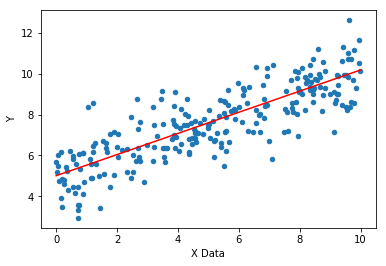

In [40]:
y_hat = x_data * model_m + model_b
my_data.sample(250).plot(kind="scatter",
                         x="X Data", y="Y")
plt.plot(x_data, y_hat, 'r')

Jose stated that the noise might make it so they might not be so different.

He noted (as I'd been thinking) that we haven't been doing the train/test split. We will with `tf.estimator`

## tf.estimator API

> Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

### Types

```
tf.estimator.LinearClassifier
tf.estimator.LinearRegressor
tf.estimator.DNNClassifier
tf.estimator.DNNRegressor
```

Jose says `DNN` is for Densely-connected Neural Network. I'm not sure that it's not Deep, but I am leaning towards thinking he's right.

Combined-type

```
tf.estimator.DNNLinearCombinedClassifier
tf.estimator.DNNLinearCombinedRegressor
```

### Steps

- Define a list of feature columns
- Create the Estimator Model
- Create a Data Input Function
- Call `train`, `evaluate`, and `predict` on the object

#### We're going to use maybe-not-the-best use case, with just one feature, but it will get us the idea

In [41]:
# deeper dive into feature column later
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [42]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019FCFE10518>, '_num_worker_replicas': 1, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_num_ps_replicas': 0, '_task_id': 0, '_task_type': 'worker', '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_device_fn': None, '_is_chief': True, '_train_distribute': None, '_save_checkpoints_secs': 600, '_service': None, '_model_dir': 'C:\\Users\\Anast\\AppData\\Local\\Temp\\tmp4lev76s_', '_tf_random_seed': None, '_log_step_count_steps': 100, '_session_config': None}


Note the output

```
INFO:tensorflow:Using default config.
WARNING:tensorflow:Using temporary folder as model directory: C:\Users\Anast\AppData\Local\Temp\tmpn9_bnvpm
INFO:tensorflow:Using config: {'_session_config': None, '_device_fn': None, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002E2998E5128>, '_task_type': 'worker', '_global_id_in_cluster': 0, '_num_worker_replicas': 1, '_log_step_count_steps': 100, '_is_chief': True, '_train_distribute': None, '_save_checkpoints_secs': 600, '_task_id': 0, '_service': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_master': '', '_tf_random_seed': None, '_evaluation_master': '', '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\Anast\\AppData\\Local\\Temp\\tmpn9_bnvpm'}
```

with probably a different string at the end of the path each time.

### Train Test Split

> We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [43]:
# type 'train_test_split', then do [Shift] + [Tab] to get the line
x_train, x_eval, y_train, y_eval = \
                train_test_split(x_data, y_true, 
                                 test_size=0.3, 
                                 random_state=101) # match Jose

In [44]:
print("x_train.shape = " + str(x_train.shape))
print("y_train.shape = " + str(y_train.shape))
print()
print("x_eval.shape = " + str(x_eval.shape))
print("y_eval.shape = " + str(y_eval.shape))

x_train.shape = (700000,)
y_train.shape = (700000,)

x_eval.shape = (300000,)
y_eval.shape = (300000,)


### Set up Estimator Inputs

> ... input_function that kind of serves like your feed dictionary and your batch size indicator ...

Jose

In [45]:
# Can also do .pandas_input_fn if you're coming from a Pandas dataframe
input_func = \
    tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                       y_train,
                                       batch_size=4,
                                       num_epochs=None,
                                       shuffle=True
    )

In [46]:
train_input_func = \
    tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                       y_train,
                                       batch_size=4,
                                       num_epochs=1000,
                                       shuffle=False
    )
#  Why shuffle is False?
#+ Jose says, "And I also wanna set shuffle equal to false.
#+            "Okay, there we go.
#+            "And the reason I have a shuffle equals false 
#+            "here for this
#+            "train is because I'm gonna be using this 
#+            "train input
#+            "function for evaluation against a test input 
#+            "function."
#+ DWB:  The one just below, eval_input_function, which also
#+ DWB: has shuffle=False
#+ DWB:  Not sure I understand this, but let's go with it.

In [47]:
eval_input_func = \
    tf.estimator.inputs.numpy_input_fn({'x':x_eval},
                                       y_eval,
                                       batch_size=4,
                                       num_epochs=1000,
                                       shuffle=False
    )

### Train the Estimator

In [48]:
estimator.train(input_fn=input_func, steps=1000)
    #  We do  steps=1000 , since we didn't specify training
    #+ epochs for our  input_func .

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Anast\AppData\Local\Temp\tmp4lev76s_\model.ckpt.
INFO:tensorflow:loss = 277.04425, step = 1
INFO:tensorflow:global_step/sec: 1040.02
INFO:tensorflow:loss = 18.916502, step = 101 (0.098 sec)
INFO:tensorflow:global_step/sec: 1348.1
INFO:tensorflow:loss = 24.089243, step = 201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1264.96
INFO:tensorflow:loss = 4.8022146, step = 301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1205.42
INFO:tensorflow:loss = 7.419866, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1540.21
INFO:tensorflow:loss = 4.0433393, step = 501 (0.064 sec)
INFO:tensorflow:global_step/sec: 1423.04
INFO:tensorflow:loss = 3.2885437, step = 601 (0.070 sec)
INFO:tensorflow:global_step/se

### Evaluation

In [49]:
train_metrics = estimator.evaluate(input_fn=train_input_func,
                                   steps=1000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-01-07-00:39:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Anast\AppData\Local\Temp\tmp4lev76s_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2024-01-07-00:39:14
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1106646, global_step = 1000, label/mean = 7.5024686, loss = 4.4426584, prediction/mean = 7.4529824
INFO:tensorflow:Saving 'checkpoint_pat

In [50]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,
                                  steps=1000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-01-07-00:39:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Anast\AppData\Local\Temp\tmp4lev76s_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2024-01-07-00:39:16
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1305045, global_step = 1000, label/mean = 7.492202, loss = 4.522018, prediction/mean = 7.411673
INFO:tensorflow:Saving 'checkpoint_path' 

In [52]:
print("train metrics: {}".format(train_metrics)) # Python 3.5 allows this form
print("eval metrics : {}".format(eval_metrics))
print("The loss is pretty close for both, which " + \
      "\nis a good sign that we're not overfitting")

train metrics: {'prediction/mean': 7.4529824, 'global_step': 1000, 'label/mean': 7.5024686, 'average_loss': 1.1106646, 'loss': 4.4426584}
eval metrics : {'prediction/mean': 7.411673, 'global_step': 1000, 'label/mean': 7.492202, 'average_loss': 1.1305045, 'loss': 4.522018}
The loss is pretty close for both, which 
is a good sign that we're not overfitting


### Predictions

In [55]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = \
    tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},
                                       shuffle=False
    )

In [56]:
estimator.predict(input_fn=input_fn_predict)

<generator object Estimator.predict at 0x0000019FCFEA3AF0>

In [57]:
# Easy to see the output of the generator by casting it as a list
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Anast\AppData\Local\Temp\tmp4lev76s_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2708926], dtype=float32)},
 {'predictions': array([4.9738164], dtype=float32)},
 {'predictions': array([5.6767406], dtype=float32)},
 {'predictions': array([6.3796644], dtype=float32)},
 {'predictions': array([7.082588], dtype=float32)},
 {'predictions': array([7.785512], dtype=float32)},
 {'predictions': array([8.488436], dtype=float32)},
 {'predictions': array([9.1913595], dtype=float32)},
 {'predictions': array([9.894283], dtype=float32)},
 {'predictions': array([10.597208], dtype=float32)}]

In [59]:
# Repeat, for size
my_list = list(estimator.predict(input_fn=input_fn_predict))
print("\nThere are " + str(len(my_list)) + " entries," + \
      "\nas we expect (as long as there are 10 entries).")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Anast\AppData\Local\Temp\tmp4lev76s_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

There are 10 entries,
as we expect (as long as there are 10 entries).


In [60]:
predictions = [] #could also use  np.array[]
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Anast\AppData\Local\Temp\tmp4lev76s_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [61]:
predictions # how did we do?

[array([4.2708926], dtype=float32),
 array([4.9738164], dtype=float32),
 array([5.6767406], dtype=float32),
 array([6.3796644], dtype=float32),
 array([7.082588], dtype=float32),
 array([7.785512], dtype=float32),
 array([8.488436], dtype=float32),
 array([9.1913595], dtype=float32),
 array([9.894283], dtype=float32),
 array([10.597208], dtype=float32)]

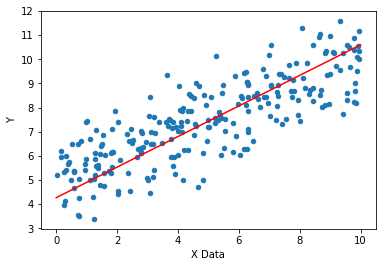

In [64]:
my_data.sample(n=250).plot(kind='scatter',
                           x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r')

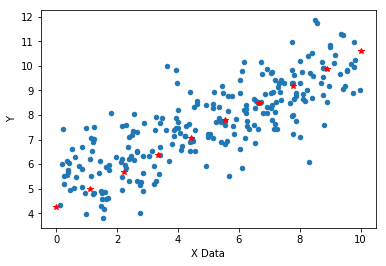

In [65]:
my_data.sample(n=250).plot(kind='scatter',
                           x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r*')

Jose usually says

# Great Job!

around here, which I think is cool.

_That's all for now!_